In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

In [3]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')

In [4]:
env.vars.load_json('strengths_quads_00_arc_cell.json')
env.vars.load_json('strengths_quads_01_ffccsyl.json')
env.vars.load_json('strengths_quads_02_ffccsxl.json')
env.vars.load_json('strengths_quads_03_ffccsyr.json')
env.vars.load_json('strengths_quads_04_ffccsxr.json')
env.vars.load_json('strengths_quads_05_ffds_lr.json')
env.vars.load_json('strengths_quads_06_straight.json')

env.vars.load_json('strengths_sext_00_arc_cell.json')

In [5]:
line = env['fccee_p_ring']
section = line.select('mid_cell_edge_r::0','mid_cell_edge_l::1')

In [6]:
# Twiss cells in the arc left and right to get boundary conditions
cell0 = line.select('mid_cell_edge_l::0','mid_cell_edge_r::0')
cell1 = line.select('mid_cell_edge_l::1','mid_cell_edge_r::1')

tw_cell_0 = cell0.twiss4d()
twinit_cell_0_r = tw_cell_0.get_twiss_init('mid_cell_edge_r')
tw_cell_1 = cell0.twiss4d()
twinit_cell_1_l = tw_cell_1.get_twiss_init('mid_cell_edge_l')

In [7]:
# Twiss
tw0 = section.twiss(init=twinit_cell_0_r,
                    compute_chromatic_properties=True,
                    strengths=True)

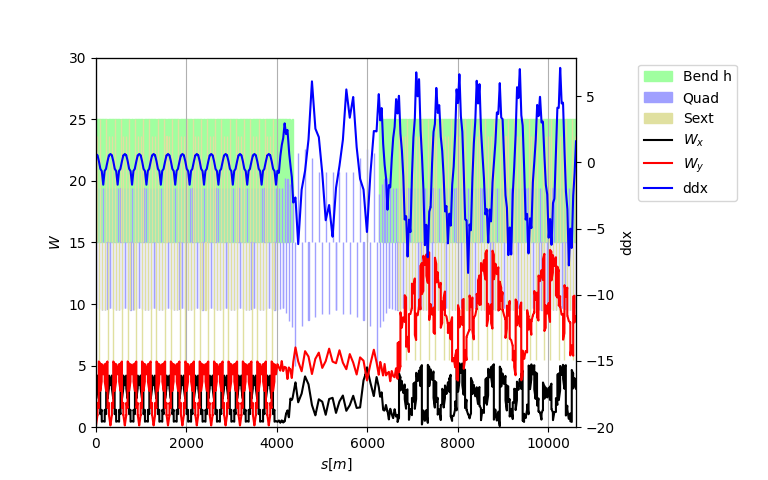

In [8]:
# W functions and second order dispersion before match
pp = tw0.plot(yl='wx_chrom wy_chrom', yr='ddx')
pp.ylim(left_lo=0, left_hi=30, right_lo=-20)

In [9]:
# Add matching knob to sextupoles close to the service straight
env.vars.default_to_zero = True
ss_sext_strengths = {}
ss_sext_strengths['ksd2ur'] = 'ksdfam2 + ksd2ur_delta'
ss_sext_strengths['ksf1ur'] = 'ksffam1 + ksf1ur_delta'
ss_sext_strengths['ksd1ur'] = 'ksdfam1 + ksd1ur_delta'
ss_sext_strengths['ksf2ur'] = 'ksffam2 + ksf2ur_delta'
ss_sext_strengths['ksf2sr'] = 'ksffam2 + ksf2sr_delta'
ss_sext_strengths['ksd1sr'] = 'ksdfam1 + ksd1sr_delta'
ss_sext_strengths['ksf1sr'] = 'ksffam1 + ksf1sr_delta'
ss_sext_strengths['ksf3sr'] = 0
ss_sext_strengths['ksf3sl'] = 0
ss_sext_strengths['ksf1sl'] = 'ksffam1 + ksf1sl_delta'
ss_sext_strengths['ksd1sl'] = 'ksdfam1 + ksd1sl_delta'
ss_sext_strengths['ksf2sl'] = 'ksffam2 + ksf2sl_delta'
ss_sext_strengths['ksf2ul'] = 'ksffam2 + ksf2ul_delta'
ss_sext_strengths['ksd1ul'] = 'ksdfam1 + ksd1ul_delta'
ss_sext_strengths['ksf1ul'] = 'ksffam1 + ksf1ul_delta'
ss_sext_strengths['ksd2ul'] = 'ksdfam2 + ksd2ul_delta'
env.vars.update(ss_sext_strengths)
env.vars.default_to_zero = False

In [10]:
# Impose left-right simmetry
env['ksd2ur_delta'] = 'ksd2ul_delta'
env['ksf1ur_delta'] = 'ksf1ul_delta'
env['ksd1ur_delta'] = 'ksd1ul_delta'
env['ksf2ur_delta'] = 'ksf2ul_delta'
env['ksf2sr_delta'] = 'ksf2sl_delta'
env['ksd1sr_delta'] = 'ksd1sl_delta'
env['ksf1sr_delta'] = 'ksf1sl_delta'

In [11]:
opt = section.match(
    name='close',
    solve=False,
    init=twinit_cell_0_r,
    compute_chromatic_properties=True,
    vary=xt.VaryList(['ksf1sl_delta', 'ksd1sl_delta', 'ksf2sl_delta', 'ksf2ul_delta',
                      'ksd1ul_delta', 'ksf1ul_delta', 'ksd2ul_delta'], step=1e-4),
    targets=[
        xt.TargetSet(
                ax_chrom=twinit_cell_0_r.ax_chrom,
                ay_chrom=twinit_cell_0_r.ay_chrom,
                bx_chrom=twinit_cell_0_r.bx_chrom,
                by_chrom=twinit_cell_0_r.by_chrom,
                ddx=twinit_cell_0_r.ddx,
                ddpx=twinit_cell_0_r.ddpx,
                at=xt.END),
        xt.TargetSet(wx_chrom=xt.LessThan(3.), wy_chrom=xt.LessThan(4.),
                     at='serv_inser_mid'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1aur'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1asr'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1aul'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1asl'),
         ]
)     

In [12]:
opt.step(10)

                                             
Optimize [close] - start penalty: 4.72                         
Matching: model call n. 110 penalty = 1.9751e-02              
Optimize [close] - end penalty:  0.0197512                            


In [16]:
opt.target_status()

Target status:               enalty = 1.9751e-02              
id state tag                     tol_met       residue   current_val target_val             description                                 
0  ON    END_ax_chrom              False   -0.00830932   -0.00830957 -2.522762737416495e-07 ('ax_chrom', 'mid_cell_edge_l'), val=-2. ...
1  ON    END_bx_chrom              False    -0.0173463      -3.42212 -3.404769950987926     ('bx_chrom', 'mid_cell_edge_l'), val=-3. ...
2  ON    END_ay_chrom              False    0.00394631    0.00394633 1.635938376321154e-08  ('ay_chrom', 'mid_cell_edge_l'), val=1.6 ...
3  ON    END_by_chrom              False    0.00206815      0.140627 0.1385591680635        ('by_chrom', 'mid_cell_edge_l'), val=0.1 ...
4  ON    END_ddx                   False   0.000437705      0.634123 0.6336855427028923     ('ddx', 'mid_cell_edge_l'), val=0.633686 ...
5  ON    END_ddpx                  False   -0.00027513  -0.000275133 -3.05119891830757e-09  ('ddpx', 'mid_cell_edge

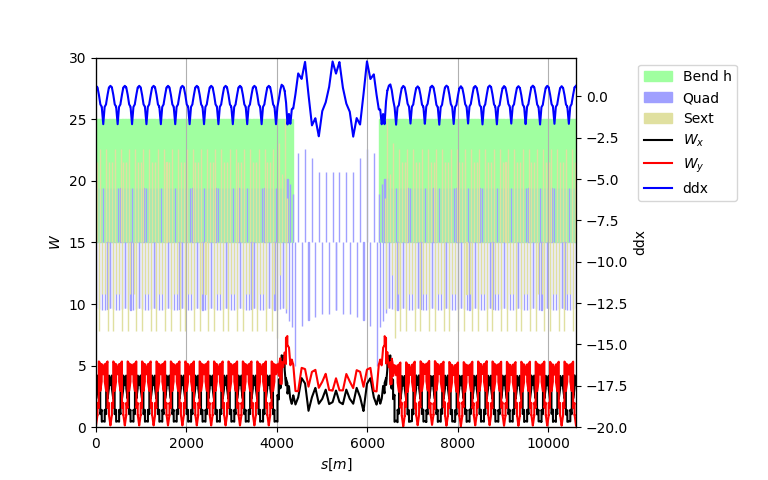

In [13]:
# W functions and second order dispersion after match
tw1 = section.twiss(init=twinit_cell_0_r,
                    compute_chromatic_properties=True,
                    strengths=True)
pp = tw1.plot(yl='wx_chrom wy_chrom', yr='ddx')
pp.ylim(left_lo=0, left_hi=30, right_lo=-20)

In [14]:
strengths = line.vars.get_table().rows[[
                 'ksf1sl_delta', 'ksd1sl_delta', 'ksf2sl_delta', 'ksf2ul_delta',
                 'ksd1ul_delta', 'ksf1ul_delta', 'ksd2ul_delta',
                 'ksf1sr_delta', 'ksd1sr_delta', 'ksf2sr_delta', 'ksf2ur_delta',
                 'ksd1ur_delta', 'ksf1ur_delta', 'ksd2ur_delta']]
strengths = strengths.to_dict()
strengths

{'ksf1sl_delta': -0.14856908776092573,
 'ksd1sl_delta': 0.0686620450624908,
 'ksf2sl_delta': 0.13061898678621955,
 'ksf2ul_delta': -0.03431586073331512,
 'ksd1ul_delta': 0.17218736935199164,
 'ksf1ul_delta': 0.01784597894339236,
 'ksd2ul_delta': -0.13411201657867367,
 'ksf1sr_delta': 'ksf1sl_delta',
 'ksd1sr_delta': 'ksd1sl_delta',
 'ksf2sr_delta': 'ksf2sl_delta',
 'ksf2ur_delta': 'ksf2ul_delta',
 'ksd1ur_delta': 'ksd1ul_delta',
 'ksf1ur_delta': 'ksf1ul_delta',
 'ksd2ur_delta': 'ksd2ul_delta'}

In [15]:
xt.json.dump(strengths, 'strengths_sext_01_straight.json')